In [3]:
 # Jalankan ini di Google Colab
!pip install --quiet pillow opencv-python matplotlib


In [4]:
# Mengimpor library untuk pengolahan gambar
from PIL import Image  # Untuk membuka dan memanipulasi gambar
import os  # Untuk mengakses file dan direktori
import numpy as np  # Untuk operasi numerik (terutama array)
import cv2  # OpenCV untuk pengolahan gambar

# Mengimpor library TensorFlow dan Keras untuk machine learning
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential  # Untuk membangun model berlapis
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout  # Layer-layer umum CNN

# Menonaktifkan peringatan deprecated
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Library untuk visualisasi
import matplotlib.pyplot as plt  # Untuk menampilkan grafik dan gambar

# Untuk mengupload/mengunduh file di Google Colab
import io
from google.colab import files


# **1. Import Data**

In [5]:
def load_images(directory):
    # Fungsi untuk memuat semua gambar dari folder tertentu

    images = []  # Inisialisasi list kosong untuk menyimpan gambar dalam bentuk array

    for filename in os.listdir(directory):  # Loop semua file dalam folder
        img_path = os.path.join(directory, filename)  # Ambil path lengkap gambar
        img = Image.open(img_path)  # Buka gambar menggunakan PIL
        img = img.resize((224, 224))  # Ubah ukuran gambar menjadi 224x224 piksel
        img = img.convert('RGB')  # Pastikan gambar dalam format RGB
        img = np.array(img)  # Ubah gambar menjadi array NumPy
        images.append(img)  # Tambahkan array gambar ke dalam list

    return images  # Kembalikan list berisi semua gambar dalam bentuk array


In [6]:
tumor_images = load_images('/content/drive/MyDrive/Pendeteksi Tumor Otak (CNN)/Dataset/yes')
no_tumor_images = load_images('/content/drive/MyDrive/Pendeteksi Tumor Otak (CNN)/Dataset/no')


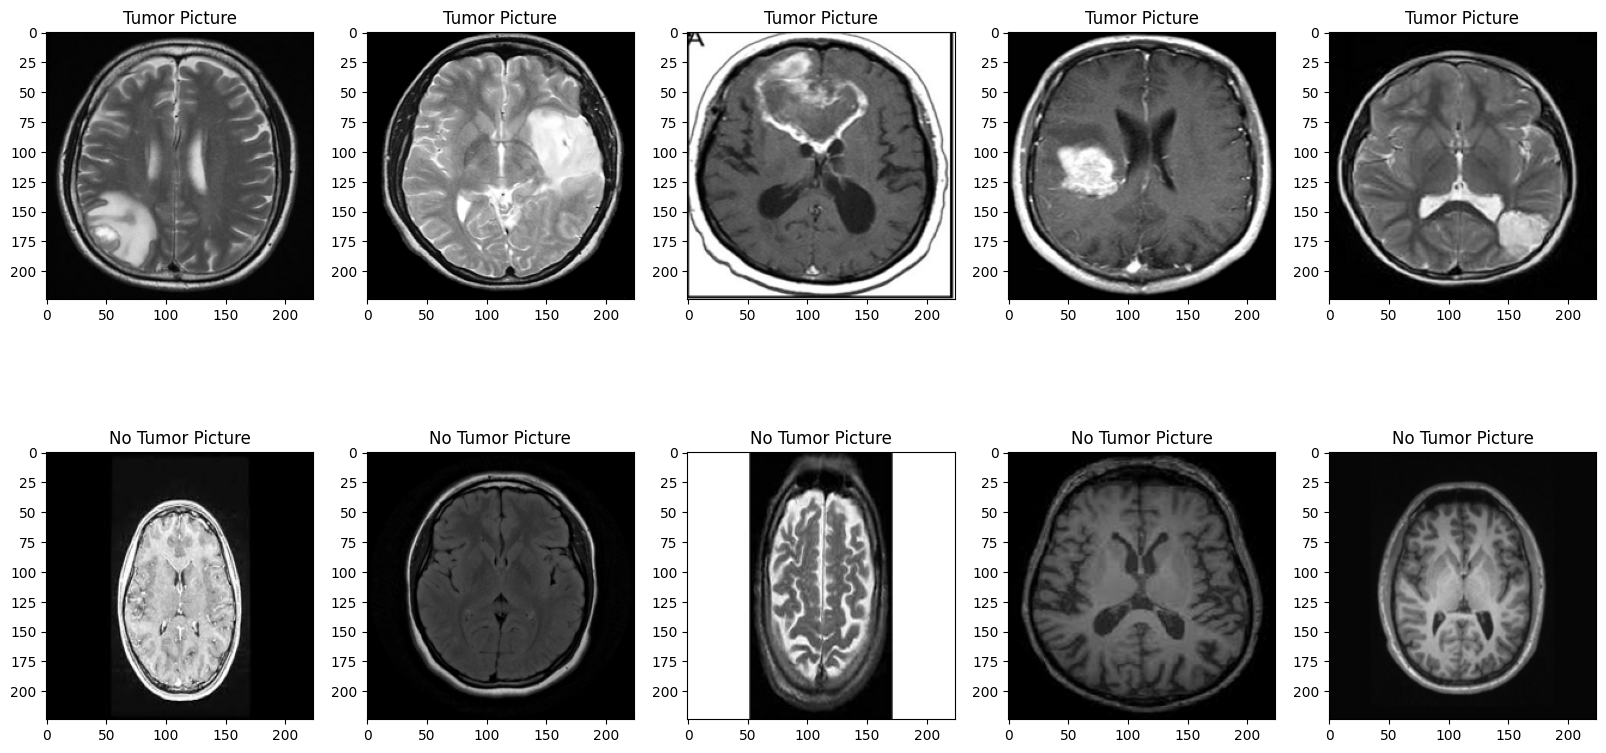

In [7]:
# Membuat grid 2 baris x 5 kolom untuk menampilkan gambar
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # Ukuran gambar (20 lebar x 10 tinggi)

# Menampilkan 5 gambar dari kelas 'tumor' di baris pertama (index 0)
for i in range(5):
    axes[0, i].imshow(tumor_images[i])  # Menampilkan gambar ke-i dari tumor
    axes[0, i].set_title('Tumor Picture')  # Judul setiap gambar
   # axes[0, i].axis('off')  # Menghilangkan sumbu (axis)

# Menampilkan 5 gambar dari kelas 'no tumor' di baris kedua (index 1)
for i in range(5):
    axes[1, i].imshow(no_tumor_images[i])  # Menampilkan gambar ke-i dari no_tumor
    axes[1, i].set_title('No Tumor Picture')  # Judul setiap gambar
   # axes[1, i].axis('off')  # Menghilangkan sumbu (axis)

# Menampilkan seluruh grid gambar di atas
plt.show()


In [6]:
# tipe data tumor_images
type(tumor_images)

# tipe data no_tumor_images
type(no_tumor_images)

list

In [7]:
# panjang data
OtakTumor = len(tumor_images)
OtakNoTumor = len(no_tumor_images)

print(OtakTumor, OtakNoTumor)

155 98


In [9]:
tumor_images

[array([[[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        ...,
 
        [[0, 0, 0],
         [1, 1, 1],
         [3, 3, 3],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[0, 0, 0],
         [1, 1, 1],
         [3, 3, 3],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],
 
        [[0, 0, 0],
         [1, 1, 1],
         [3, 3, 3],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [10]:
no_tumor_images

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

# **2. Labeling**

In [8]:
# Fungsi untuk memberi label pada dataset gambar
def assign_label(tumor_images, no_tumor_images):
    # Buat array label untuk gambar tumor (label = 1)
    tumor_labels = np.ones(len(tumor_images))  # Misal ada 100 gambar tumor, maka hasilnya [1. 1. 1. ... 1.]

    # Buat array label untuk gambar tanpa tumor (label = 0)
    no_tumor_labels = np.zeros(len(no_tumor_images))  # Misal ada 100 gambar no_tumor, maka hasilnya [0. 0. 0. ... 0.]

    # Kembalikan kedua array label
    return tumor_labels, no_tumor_labels

# Memanggil fungsi dan menyimpan label ke dalam variabel
tumor_labels, no_tumor_labels = assign_label(tumor_images, no_tumor_images)


In [12]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [13]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
type(tumor_labels)

numpy.ndarray

In [15]:
len(tumor_labels)

155

In [16]:
len(no_tumor_labels)

98

In [9]:
# Menggabungkan masing-masing 2 list dan array

data = tumor_images + no_tumor_images # gabung menjadi 1 list besar bernama data
labels = np.concatenate((tumor_labels,no_tumor_labels), axis = 0) #np.concatenate menggabungkna 2 array

# concatenate = menggabungkan dua atau beberapa string teks menjadi satu string

In [18]:
data

[array([[[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        ...,
 
        [[0, 0, 0],
         [1, 1, 1],
         [3, 3, 3],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[0, 0, 0],
         [1, 1, 1],
         [3, 3, 3],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],
 
        [[0, 0, 0],
         [1, 1, 1],
         [3, 3, 3],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [19]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
data[0].shape
'''
224 piksel tinggi (height)

224 piksel lebar (width)

3 channel warna (RGB)
'''

'\n224 piksel tinggi (height)\n\n224 piksel lebar (width)\n\n3 channel warna (RGB)\n'

# **3. Splitting Data**

Pada tahap ini, dataset dibagi menjadi dua bagian utama, yaitu

*   data latih (training set)
*   data uji (testing set)



Pembagian ini bertujuan agar model machine learning dapat belajar dari sebagian data, kemudian dilakukan pengujian terhadap data lain yang belum pernah dilihat oleh model. Dengan demikian, performa model dapat dievaluasi secara objektif dan tidak bias terhadap data yang sudah pernah digunakan dalam pelatihan.

Umumnya, data dibagi dengan rasio 80:20 atau 70:30, tergantung pada ukuran dan karakteristik dataset.

Biasanya dibagi 80% buat training, 20% buat testing.

In [11]:
dataType = type(data)
labelsType = type(labels)

print(dataType, labelsType)


<class 'list'> <class 'numpy.ndarray'>


In [12]:
# Jika data dan labels masih berupa list, maka perlu dikonversi ke NumPy array untuk keperluan pemrosesan data
x = np.array(data)
y = np.array(labels)


In [23]:
x

array([[[[  1,   1,   1],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4]],

        [[  1,   1,   1],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4]],

        [[  1,   1,   1],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4]],

        ...,

        [[  0,   0,   0],
         [  1,   1,   1],
         [  3,   3,   3],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4]],

        [[  0,   0,   0],
         [  1,   1,   1],
         [  3,   3,   3],
         ...,
         [  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3]],

        [[  0,   0,   0],
         [  1,   1,   1],
         [  3,   3,   3],
         ...,
         [  3,   3,   3],
        

In [13]:
# Import fungsi untuk membagi dataset
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih (80%) dan data uji (20%)
# X: fitur/data input, y: label/target
# random_state=42 digunakan agar hasil pembagian selalu konsisten setiap dijalankan
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [14]:
# Split the dataset into training, validation, and test sets
train_size = int(0.8 * len(x))
test_size = int(0.2 * len(x)) # <--- Anda bisa ubah persentase ini
# Note: validation_size is now implicitly handled by splitting the training set further

# Split the data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42) # <--- dan test_size di sini

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # <--- serta test_size di sini (ini 25% dari data training awal, bukan total)

In [15]:
# Membuat dataset TensorFlow dari data fitur dan label pelatihan
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Membuat dataset TensorFlow dari data fitur dan label pengujian
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))


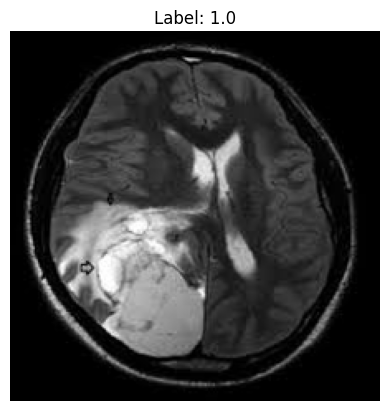

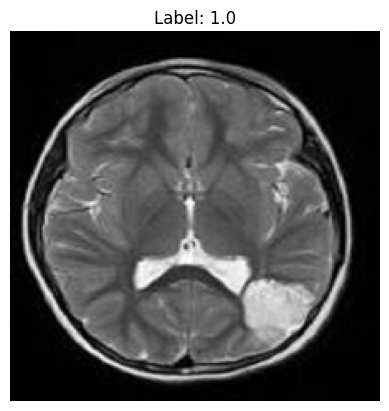

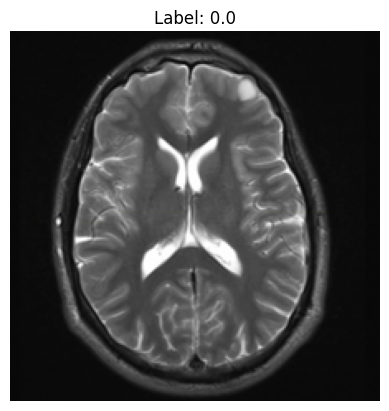

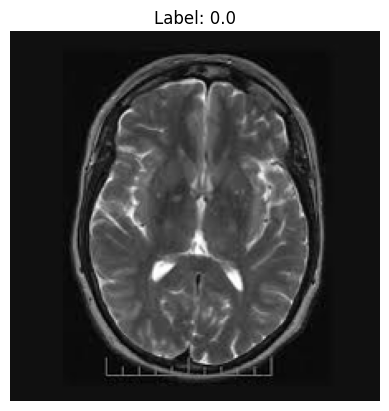

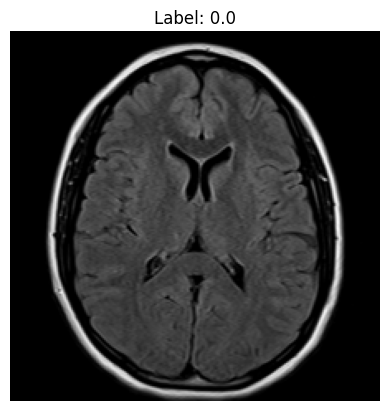

In [16]:
# Loop sebanyak 5 kali untuk mengambil 5 contoh data dari dataset 'train'
for image, label in train.take(5):

  # Membuat figure baru untuk setiap gambar
  plt.figure()

  # Menampilkan gambar dalam format array numpy
  plt.imshow(image.numpy())

  # Menambahkan judul pada gambar sesuai dengan label-nya
  plt.title('Label: {}'.format(label.numpy()))

  # Menghilangkan sumbu x dan y agar tampil lebih bersih
  plt.axis('off')

  # Menampilkan gambar
  plt.show()


In [17]:
validation_size = int(0.1 * 202)  # Menghitung 10% dari total data (202) untuk digunakan sebagai data validasi
train = train.skip(validation_size)  # Melewati sejumlah data (10%) dari awal dataset untuk menyisakan 90% sebagai data training (data 10% di skip lempar ke validation)
validation = train.take(validation_size)  # Mengambil 10% data dari awal dataset untuk digunakan sebagai data validasi

In [18]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)  # Mengelompokkan data training menjadi batch dengan ukuran 32
test = test.batch(BATCH_SIZE)  # Mengelompokkan data pengujian menjadi batch dengan ukuran 32
validation = validation.batch(BATCH_SIZE)  # Mengelompokkan data validasi menjadi batch dengan ukuran 32

# 4. Training Data

In [19]:
model = Sequential()  # Membuat model berlapis secara berurutan

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3), padding='valid'))
# Menambahkan layer konvolusi dengan 32 filter ukuran 3x3, aktivasi ReLU
# input_shape menunjukkan ukuran gambar: 224x224 piksel dengan 3 channel warna (RGB)

model.add(MaxPooling2D(2,2))
# Mengurangi ukuran gambar (downsampling) dengan cara mengambil nilai maksimum dari blok 2x2

model.add(Flatten())
# Mengubah hasil layer sebelumnya (2D) menjadi 1D agar bisa masuk ke layer fully connected

model.add(Dense(256, activation='relu'))
# Menambahkan layer fully connected (dense) dengan 256 neuron dan aktivasi ReLU

model.add(Dropout(0.5))
# Mengurangi overfitting dengan mengabaikan (drop) 50% neuron secara acak saat training

model.add(Dense(1, activation='sigmoid'))
# Layer output dengan 1 neuron dan aktivasi sigmoid (digunakan untuk klasifikasi biner: 0 atau 1)
# 0 : No Tumor
# 1 : Tumor


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │   100,933,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Menyusun (compile) model sebelum training
# Menggunakan 'adam' sebagai optimizer untuk mempercepat dan menstabilkan proses pembelajaran
# Menggunakan 'binary_crossentropy' sebagai fungsi loss karena ini adalah masalah klasifikasi biner (dua kelas: 0 atau 1)
# Metrik yang dipantau selama training dan evaluasi adalah 'accuracy' untuk melihat seberapa akurat prediksi model


In [23]:
history = model.fit(train, validation_data=validation, epochs=10, verbose=1)
# Melatih model menggunakan data training selama 10 epoch (putaran penuh)
# Data validasi digunakan untuk mengevaluasi performa model di akhir setiap epoch
# verbose=1 menampilkan progress training secara detail (dengan progress bar dan hasil per epoch)
# Hasil training (seperti loss dan akurasi tiap epoch) disimpan dalam variabel 'history'


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5517 - loss: 2122.4487 - val_accuracy: 0.3000 - val_loss: 1399.3699
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5236 - loss: 897.4850 - val_accuracy: 0.7000 - val_loss: 789.0393
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7112 - loss: 487.4171 - val_accuracy: 0.8000 - val_loss: 121.7625
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.6935 - loss: 207.8479 - val_accuracy: 0.8000 - val_loss: 114.7254
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.8159 - loss: 110.9348 - val_accuracy: 0.8500 - val_loss: 10.5856
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7803 - loss: 62.1574 - val_accuracy: 0.9500 - val_loss: 9.3311
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9020 - loss: 20.7790 - val_accuracy: 0.8500 - val_loss: 18.7585
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.8989 - loss: 28.0727 - val_accuracy: 0.9500 - 

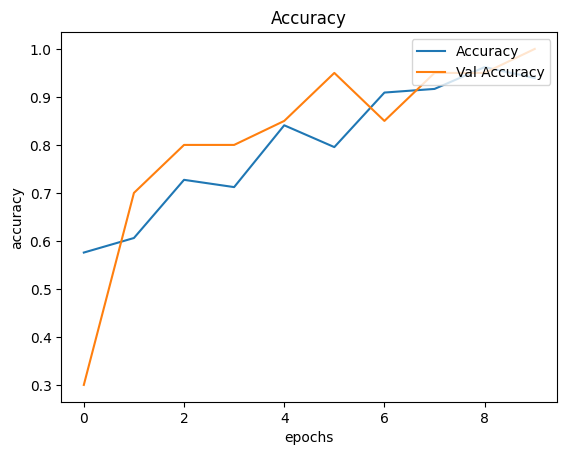

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

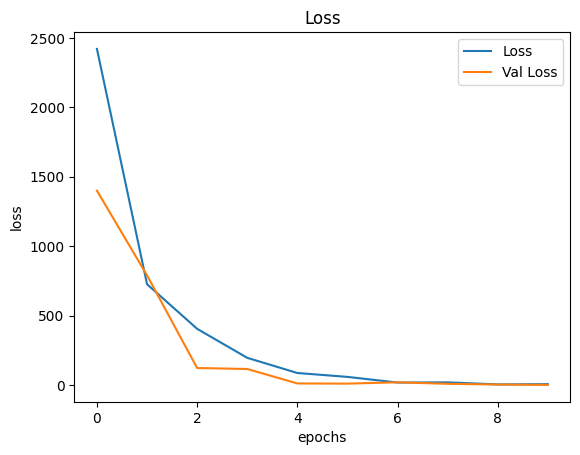

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc='upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Pendeteksi Tumor Otak (CNN)/tumor_otak.h5')

# **5. Testing**

In [26]:
# Fungsi untuk memuat dan memproses gambar yang diunggah
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))      # Membaca gambar dari byte
    img = img.resize((224, 224))                   # Mengubah ukuran gambar jadi 224x224 piksel
    img_array = np.array(img)                      # Mengubah gambar jadi array numpy
    img_array = img_array / 255.0                  # Normalisasi pixel (0–1)
    return img_array

# Fungsi untuk memprediksi gambar tumor atau tidak
def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)   # Panggil fungsi pemrosesan gambar
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch (jadi bentuk [1, 224, 224, 3])

    prediction = model.predict(img_array)          # Gunakan model untuk prediksi

    # Jika probabilitas prediksi > 0.5, berarti terdeteksi tumor
    if prediction[0][0] > 0.5:
        return "Tumor detected"
    else:
        return "No tumor detected"


Saving istockphoto-478203362-170667a (1).jpg to istockphoto-478203362-170667a (1).jpg


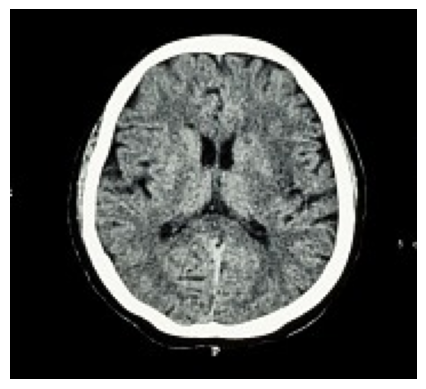

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
No tumor detected


In [35]:
# Upload gambar dari pengguna
uploaded = files.upload()                          # Membuka dialog untuk upload file
file_name = list(uploaded.keys())[0]               # Ambil nama file pertama
image_bytes = uploaded[file_name]                  # Ambil isi byte file
img = Image.open(io.BytesIO(image_bytes))          # Buka file gambar untuk ditampilkan

# Tampilkan gambar yang di-upload
plt.imshow(img)
plt.axis('off')                                    # Hilangkan sumbu X dan Y
plt.show()

# Lakukan prediksi dan cetak hasilnya
result = predict_image(image_bytes)
print(result)